<a href="https://colab.research.google.com/github/Moriblo/MVP_Spt4_EngSoft/blob/main/MVP_SPT4_EngSoft_MLFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Software - MVP Sprint 4

## Coleta de Dados

### _Requirements

In [21]:
!pip install gdown

In [54]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from google.colab import drive

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from google.colab import files
from IPython.display import display, HTML
from scipy import stats
from pickle import dump
from pickle import load

### _Carga dos Datasets

In [23]:
# Informa a URL de importação do dataset
id_arquivo_1 = '1R8vASJ_vSzykspidSdAVEXvnWIW8gIiG'
id_arquivo_2 = '1eFlNnCsX8HtRjAgPA2IsM-9nzKwG3FLD'
id_arquivo_cad = '1yO9-XahOdUOj00g9SyBBETASc84mRNtt'

# URLs para download direto dos arquivos
url_1 = f'https://drive.google.com/uc?id={id_arquivo_1}'
url_2 = f'https://drive.google.com/uc?id={id_arquivo_2}'
url_cad = f'https://drive.google.com/uc?id={id_arquivo_cad}'

# Faça o download dos arquivos
gdown.download(url_1, 'arquivo1.csv', quiet=False)
gdown.download(url_2, 'arquivo2.csv', quiet=False)
gdown.download(url_cad, 'arquivocad.csv', quiet=False)

# Lê o arquivo
df_1 = pd.read_csv('arquivo1.csv', delimiter=';')
df_2 = pd.read_csv('arquivo2.csv', delimiter=';')
df_cad = pd.read_csv('arquivocad.csv', delimiter=';')

# df_1 é o dataframe com os dados performance diária do mês M-1
# df_2 é o dataframe com os dados de performance diária do mês M
# df_cad é o dataframe com os dados de cadastro dos Fundos de Investimento

df_m1 = df_1
df_m2 = df_2

Downloading...
From: https://drive.google.com/uc?id=1R8vASJ_vSzykspidSdAVEXvnWIW8gIiG
To: /content/arquivo1.csv
100%|██████████| 46.2M/46.2M [00:00<00:00, 77.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eFlNnCsX8HtRjAgPA2IsM-9nzKwG3FLD
To: /content/arquivo2.csv
100%|██████████| 49.0M/49.0M [00:00<00:00, 70.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yO9-XahOdUOj00g9SyBBETASc84mRNtt
To: /content/arquivocad.csv
100%|██████████| 3.59M/3.59M [00:00<00:00, 21.6MB/s]


## _RESET DE DATAFRAME

In [24]:
df_m1 = df_1 # para não necessitar realizar carga a cada mudança no código
df_m2 = df_2 # para não necessitar realizar carga a cada mudança no código

## Pré-processamento

### _Limpeza

#### __Redundâncias

In [25]:
# Adequando VL_QUOTA à quantidade de casas decimais informada no Dicionário de
# Dados do dataset de origem
df_m1['VL_QUOTA'] = df_m1['VL_QUOTA'].astype(str).str.replace('.', '')
df_m1['VL_QUOTA'] = df_m1['VL_QUOTA'].astype(float)
df_m1['VL_QUOTA'] = df_m1['VL_QUOTA'] / (10**12)

df_m2['VL_QUOTA'] = df_m2['VL_QUOTA'].astype(str).str.replace('.', '')
df_m2['VL_QUOTA'] = df_m2['VL_QUOTA'].astype(float)
df_m2['VL_QUOTA'] = df_m2['VL_QUOTA'] / (10**12)

# Removendo as tuplas em que VL_QUOTA seja negativo (para efeito de cálculo de
# retorno)
df_m1 = df_m1[df_m1["VL_QUOTA"] >= 0]
df_m2 = df_m2[df_m2["VL_QUOTA"] >= 0]

####### AVALIANDO OS DADOS #######

# Criação de DataFrames temporários para armazenar os tipos de dados e contagens
temp1 = pd.DataFrame(df_1.dtypes, columns=['df_m1_dtypes'])
temp2 = pd.DataFrame(df_2.dtypes, columns=['df_m2_dtypes'])
temp3 = pd.DataFrame(df_1.count(), columns=['df_m1_count'])
temp4 = pd.DataFrame(df_2.count(), columns=['df_m2_count'])

# Criação de DataFrames temporários para armazenar as informações de shape
temp5 = pd.DataFrame([df_m1.shape], columns=['df_m1_rows', 'df_m1_cols'])
temp6 = pd.DataFrame([df_m2.shape], columns=['df_m2_rows', 'df_m2_cols'])

# Concatenação dos DataFrames lado a lado
result = pd.concat([temp1, temp2, temp3, temp4], axis=1)

# Exibição do resultado
print(result)
print()
print('* Avaliação de df_m1:')
print()
print(temp5.to_string(index=False))
display(df_m1.describe())
print()
print('* Avaliação de df_m2:')
print()
print(temp6.to_string(index=False))
display(df_m2.describe())

              df_m1_dtypes df_m2_dtypes  df_m1_count  df_m2_count
TP_FUNDO            object       object       505556       537278
CNPJ_FUNDO          object       object       505556       537278
DT_COMPTC           object       object       505556       537278
VL_TOTAL           float64      float64       505556       537278
VL_QUOTA           float64      float64       505556       537278
VL_PATRIM_LIQ      float64      float64       505556       537278
CAPTC_DIA          float64      float64       505556       537278
RESG_DIA           float64      float64       505556       537278
NR_COTST             int64        int64       505556       537278

* Avaliação de df_m1:

 df_m1_rows  df_m1_cols
     505152           9


,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
count,5.051520e+05,5.051520e+05,5.051520e+05,5.051520e+05,5.051520e+05,5.051520e+05
mean,4.213980e+08,1.785431e+04,4.206399e+08,2.341868e+06,2.353635e+06,1.001893e+03
std,2.819297e+09,9.689061e+05,2.816258e+09,4.613030e+07,5.334481e+07,1.645567e+04
min,-4.555807e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.535371e+07,1.182997e+00,1.539842e+07,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.306366e+07,2.119174e+00,4.316420e+07,0.000000e+00,0.000000e+00,2.000000e+00
75%,1.558318e+08,2.544611e+01,1.560282e+08,0.000000e+00,0.000000e+00,1.600000e+01
max,1.632093e+11,1.067943e+08,1.632091e+11,7.671206e+09,1.437241e+10,1.185455e+06



* Avaliação de df_m2:

 df_m2_rows  df_m2_cols
     536874           9


,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
count,5.368740e+05,5.368740e+05,5.368740e+05,5.368740e+05,5.368740e+05,5.368740e+05
mean,4.160074e+08,1.615053e+04,4.152680e+08,2.304712e+06,2.369199e+06,9.895581e+02
std,2.789516e+09,8.448188e+05,2.787043e+09,4.702319e+07,5.269102e+07,1.638518e+04
min,-3.073482e+08,0.000000e+00,-4.150969e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.481920e+07,1.165526e+00,1.484767e+07,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.167161e+07,2.062146e+00,4.173578e+07,0.000000e+00,0.000000e+00,2.000000e+00
75%,1.512468e+08,2.493133e+01,1.513313e+08,0.000000e+00,0.000000e+00,1.500000e+01
max,1.606797e+11,1.065101e+08,1.606795e+11,1.276418e+10,1.423898e+10,1.195044e+06


#### __Missings

In [26]:
####### MARCANDO E PREENCHENDO OS DATAFRAMES  #######
# Considerando somente os dígitos referente ao "dia" em relação a
# DT_COMPTC (Data de competência do documento)
df_m1['DT_COMPTC_DIA'] = df_m1['DT_COMPTC'].str.slice(0, 2)
df_m2['DT_COMPTC_DIA'] = df_m2['DT_COMPTC'].str.slice(0, 2)

# Definindo o index para o JOIN
df_m1.set_index(['CNPJ_FUNDO', 'DT_COMPTC_DIA'], inplace=True)
df_m2.set_index(['CNPJ_FUNDO', 'DT_COMPTC_DIA'], inplace=True)

# JOIN os dois DataFrames usando o índice
df_atrib = df_m1.join(df_m2, rsuffix='_1')

# Resetar o índice
df_atrib.reset_index(inplace=True)

# Merge entre df_3 e df_cad para classificar os CNPJs em df_3 com sua respectiva
# classe de fundo obtida de df_cad.
df_atrib = df_atrib.merge(df_cad[['CNPJ_FUNDO', 'CLASSE']], on='CNPJ_FUNDO', how='left')

# Calculando o retorno, dia a dia, do mês analisado (df_2) em relação ao
# mês anterior (df_1) na coluna RETORNO com cinco casas decimais
df_atrib['RETORNO'] = (df_atrib['VL_QUOTA_1'] - df_atrib['VL_QUOTA']).round(5)


#### __Agregação

In [27]:
####### AGREGAÇÃO NO DATAFRAME DE ATRIBUTOS (df_atrib) #######

# Mantém somente as colunas referentes ao mês anterior (M-1 -> df_1)
df_atrib = df_atrib.filter(regex='[^_1]$')

# Considerando que RETORNO > 0, É um bom investimento (SUGESTÃO = 1), caso
# contrário NÃO É um bom investimento (SUGESTÃO = 0)
df_atrib['SUGESTÃO'] = df_atrib['RETORNO'].apply(lambda x: 1 if x > 0 else 0)

# Limpa coluna RETORNO
df_atrib = df_atrib.replace(['#NOME?', '', '-Infinity'], np.nan)
df_atrib = df_atrib.dropna(subset=['RETORNO'])
df_atrib['RETORNO'] = df_atrib['RETORNO'].astype(str)
df_atrib = df_atrib.replace(['-Infinity', '-inf'], np.nan)
df_atrib = df_atrib.dropna(subset=['RETORNO'])
df_atrib = df_atrib.reset_index()

# Fazendo NR_COTST (Número de Cotistas) > 1000
df_atrib['NR_COTST'] = df_atrib['NR_COTST'].astype(int)
df_atrib = df_atrib[(df_atrib['NR_COTST'] > 1000)]

# Após avaliação dos dados, passou-se a considerar a limitação para o Valor do
# Patrimônio Líquido do Fundo acima de 1.000.000
df_atrib = df_atrib[(df_atrib['VL_PATRIM_LIQ'] > 1000000)]

# Filtrando os dados do dataframe para conter somente a CLASSE Fundo Multimercado
df_atrib = df_atrib[(df_atrib['CLASSE'] == "Fundo Multimercado")]

# Mantendo os atributos relevantes
df_atrib = df_atrib[['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ', \
                     'SUGESTÃO']]

# Converte o atributo SUGESTÃO em booleano
df_atrib['SUGESTÃO'] = df_atrib['SUGESTÃO'].astype(bool)

#### __Tratando Outliers

In [28]:
####### TRATANDO OUTLIERS COM MÉTODO IQR (Interquartile Range) #######

# Salvando a coluna 'SUGESTÃO' em um DataFrame separado antes do tratamento dos outliers
df_sugestao = df_atrib[['SUGESTÃO']]

df_iqr = df_atrib[['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ']]

# Calculando IQR
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)
IQR = Q3 - Q1

# Os outliers são então definidos como observações que estão abaixo de (Q1 - 1.5 * IQR)
# ou acima de (Q3 + 1.5 * IQR).
df_iqr = df_iqr[~((df_iqr < (Q1 - 1.5 * IQR)) | (df_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]

# Junte 'df_sugestao' de volta a 'df_iqr'
df_atrib = df_iqr.join(df_sugestao)

df_atrib['SUGESTÃO'] = df_atrib['SUGESTÃO'].astype(int)

#### __Apresentação dos Atributos

* Avaliação de df_atrib:
              df_atrib_dtypes  df_atrib_count
RESG_DIA              float64            4730
CAPTC_DIA             float64            4730
NR_COTST                int64            4730
VL_PATRIM_LIQ         float64            4730
SUGESTÃO                int64            4730

** SUGESTÃO
0    2675
1    2055



,RESG_DIA,CAPTC_DIA,NR_COTST,VL_PATRIM_LIQ,SUGESTÃO
count,4.730000e+03,4730.000000,4730.000000,4.730000e+03,4730.000000
mean,1.876354e+05,55744.600129,3677.029387,2.051673e+08,0.434461
std,2.998734e+05,105854.196638,3279.550184,2.271982e+08,0.495738
min,0.000000e+00,0.000000,1001.000000,1.120432e+06,0.000000
25%,0.000000e+00,0.000000,1447.250000,5.101801e+07,0.000000
50%,4.959794e+04,5000.000000,2296.000000,1.185181e+08,0.000000
75%,2.361614e+05,57195.157500,4599.500000,2.646213e+08,1.000000
max,1.448670e+06,541099.800000,15979.000000,1.193216e+09,1.000000


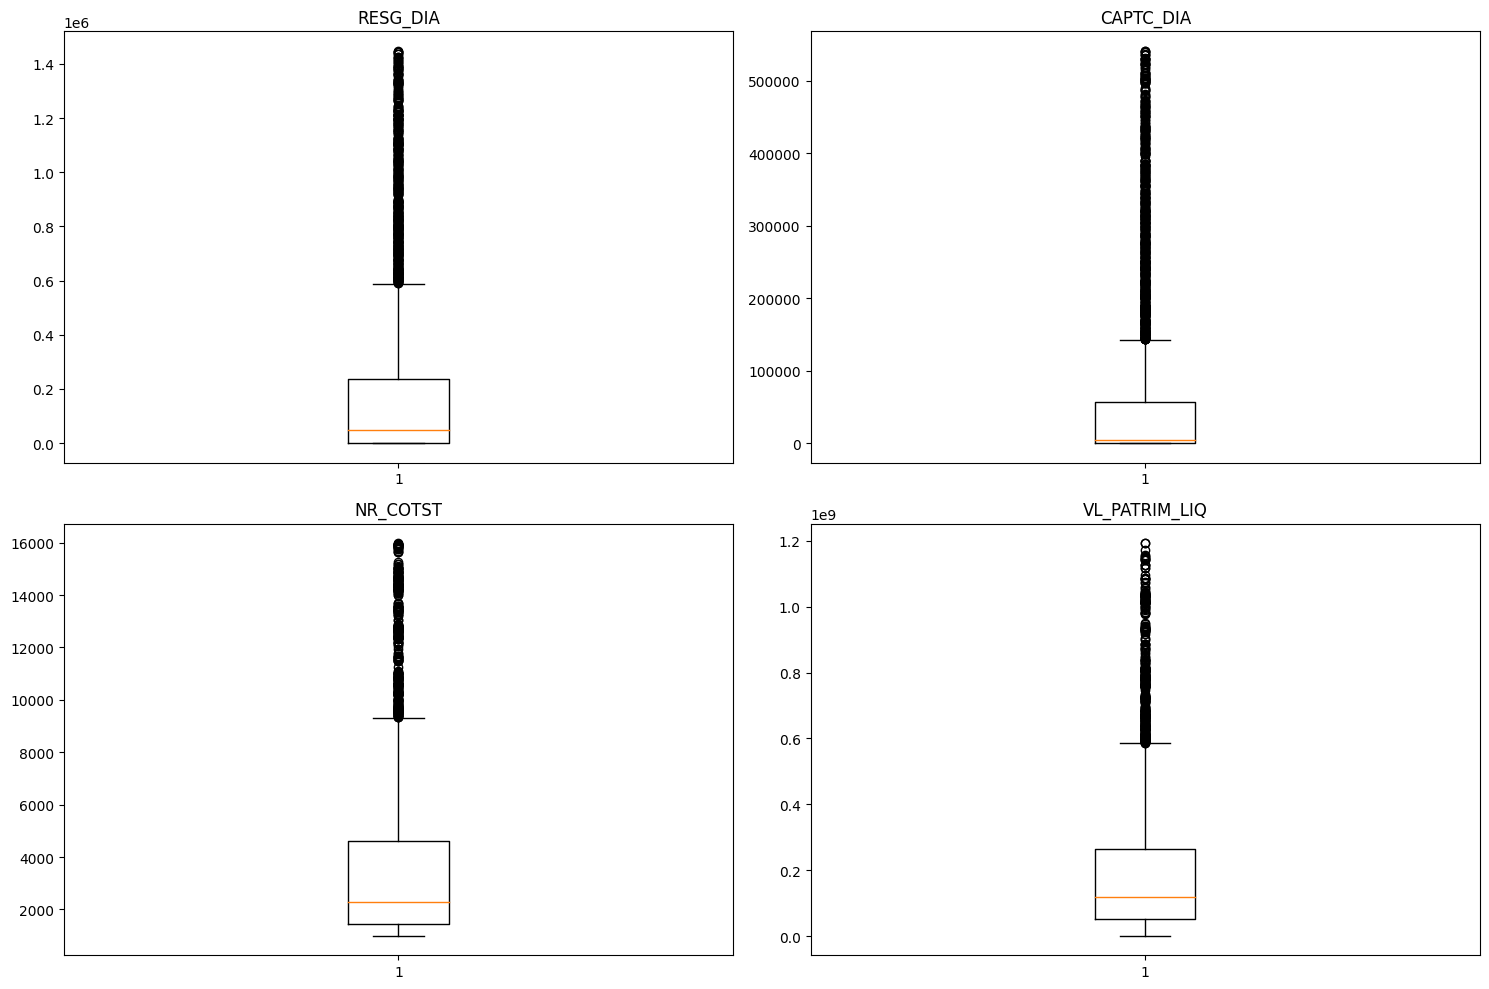

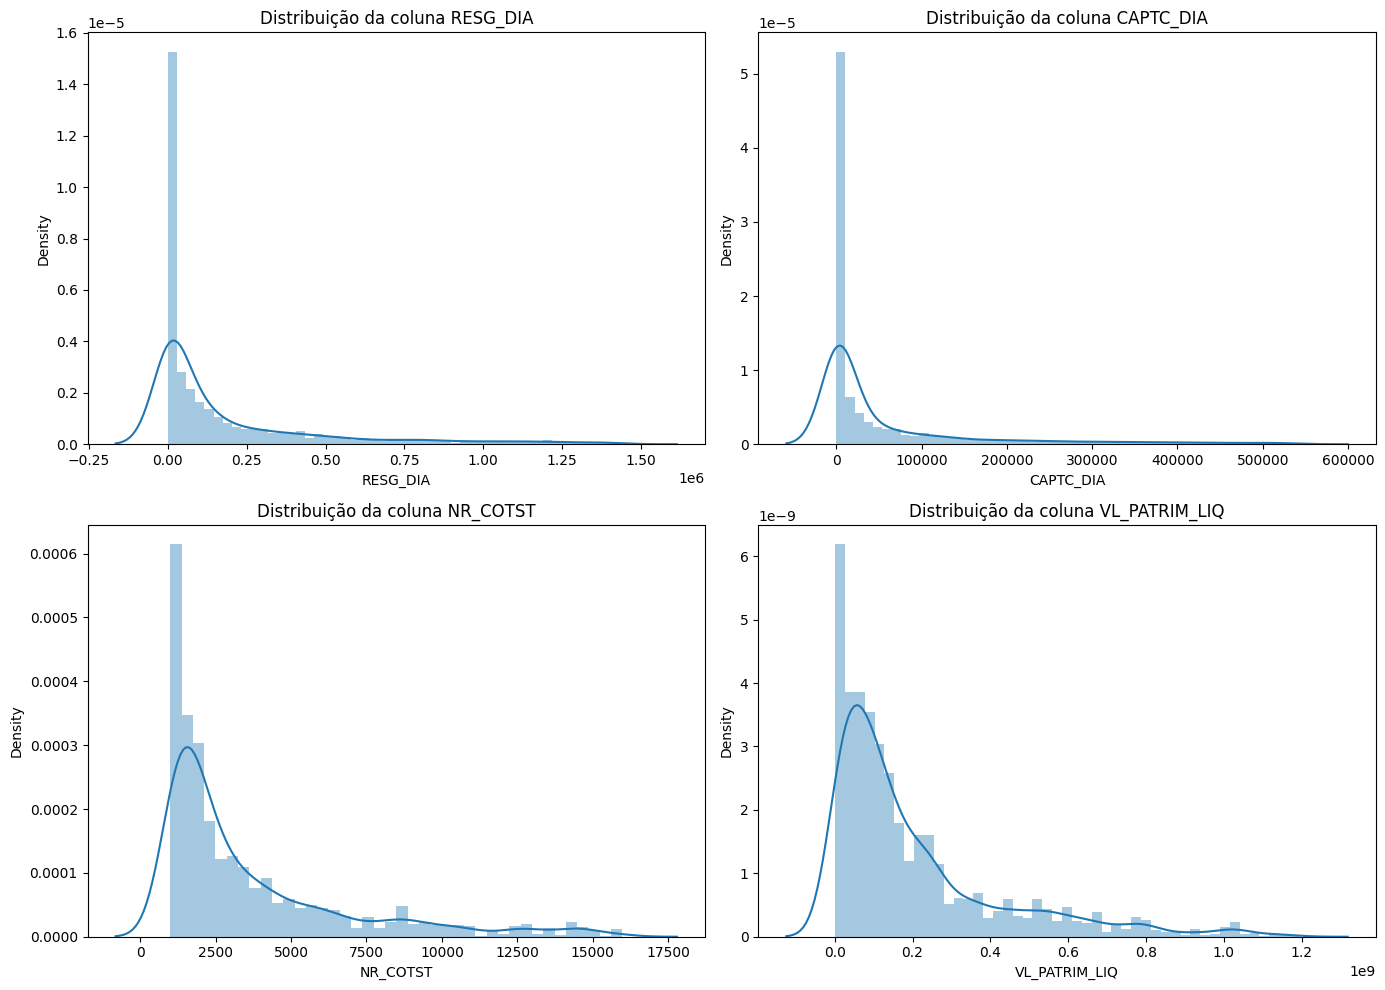

In [29]:
####### AVALIANDO OS DADOS #######

### DADOS TABELADOS ###

# Criação de DataFrames temporários para armazenar os tipos de dados e contagens
temp1 = pd.DataFrame(df_atrib.dtypes, columns=['df_atrib_dtypes'])
temp2 = pd.DataFrame(df_atrib.count(), columns=['df_atrib_count'])

# Criação de DataFrames temporários para armazenar as informações de shape
temp3 = pd.DataFrame([df_atrib.shape])

# Concatenação dos DataFrames lado a lado
result = pd.concat([temp1, temp2], axis=1)

# Comportamento de SUGESTÃO
counts = df_atrib['SUGESTÃO'].value_counts()

# Exibição do resultado
print("* Avaliação de df_atrib:")
print(result)
print()
print("** SUGESTÃO")
print(counts.to_string(dtype=False))
print()
display(df_atrib.describe())

### BOXPLOT ###

df_box = df_atrib[['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', \
                     'VL_PATRIM_LIQ']]

cols = ['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', \
                     'VL_PATRIM_LIQ']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(cols):
    ax = axs[i//2, i%2]  # Determina a posição do subplot
    ax.boxplot(df_box[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

### DISTRIBUIÇÃO LINEAR ###

# Lista das colunas a visualizar
cols = ['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ']

# Cria uma figura com 2 linhas e 2 colunas de subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Para cada coluna, cria um gráfico de distribuição linear
for i, col in enumerate(cols):
    sns.distplot(df_atrib[col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Distribuição da coluna {}'.format(col))

plt.tight_layout()
plt.show()

### _Separação em conjunto de treino e conjunto de teste com holdout

In [30]:
####### DEFININDO PARÂMETROS DO CONJUNTO DE TESTES #######

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df_atrib.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.686835 (0.016692)
CART: 0.772719 (0.028932)
NB: 0.575321 (0.011444)
SVM: 0.559994 (0.011113)


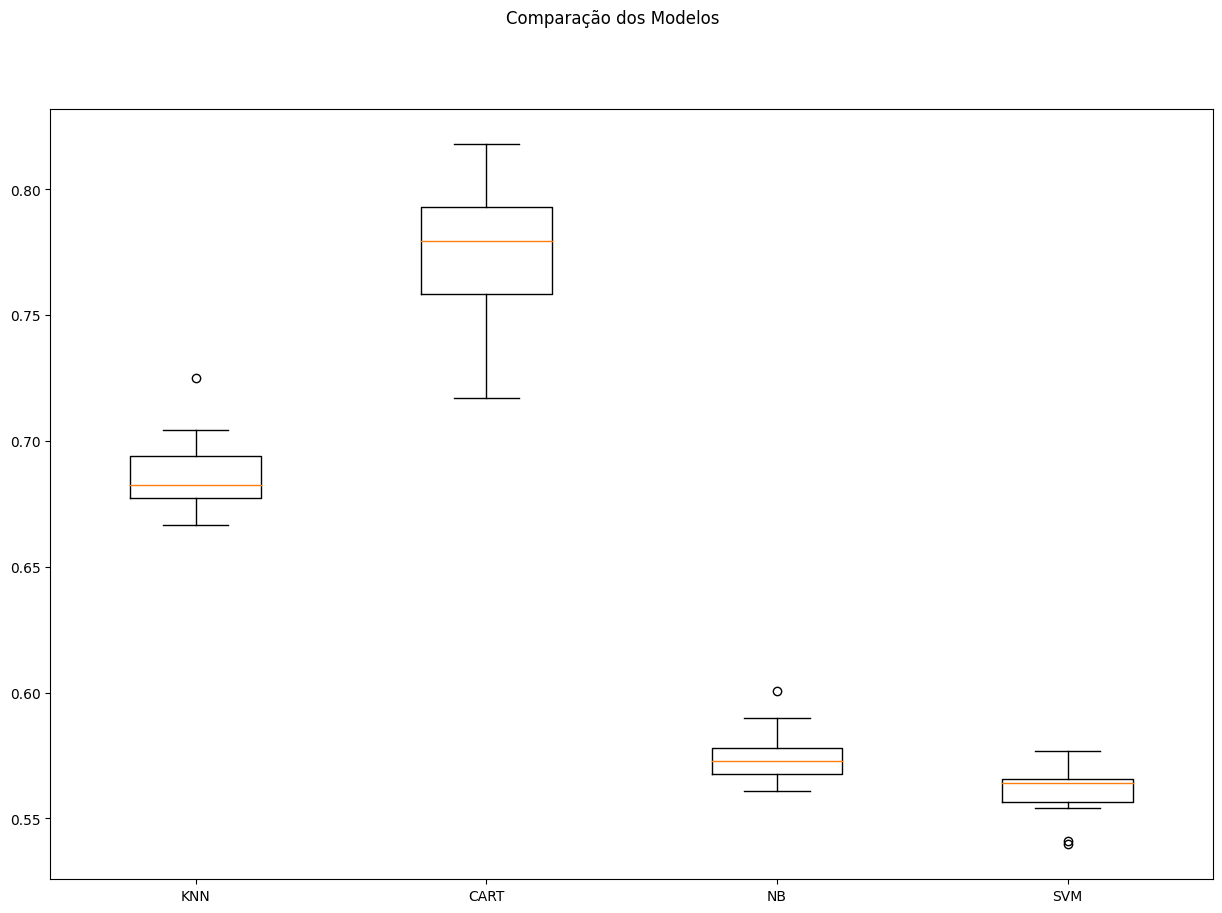

In [31]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.687 (0.017)
CART-orig: 0.773 (0.029)
NB-orig: 0.575 (0.011)
SVM-orig: 0.560 (0.011)
KNN-padr: 0.658 (0.025)
CART-padr: 0.773 (0.028)
NB-padr: 0.575 (0.012)
SVM-padr: 0.594 (0.012)
KNN-norm: 0.661 (0.024)
CART-norm: 0.771 (0.025)
NB-norm: 0.575 (0.012)
SVM-norm: 0.595 (0.011)


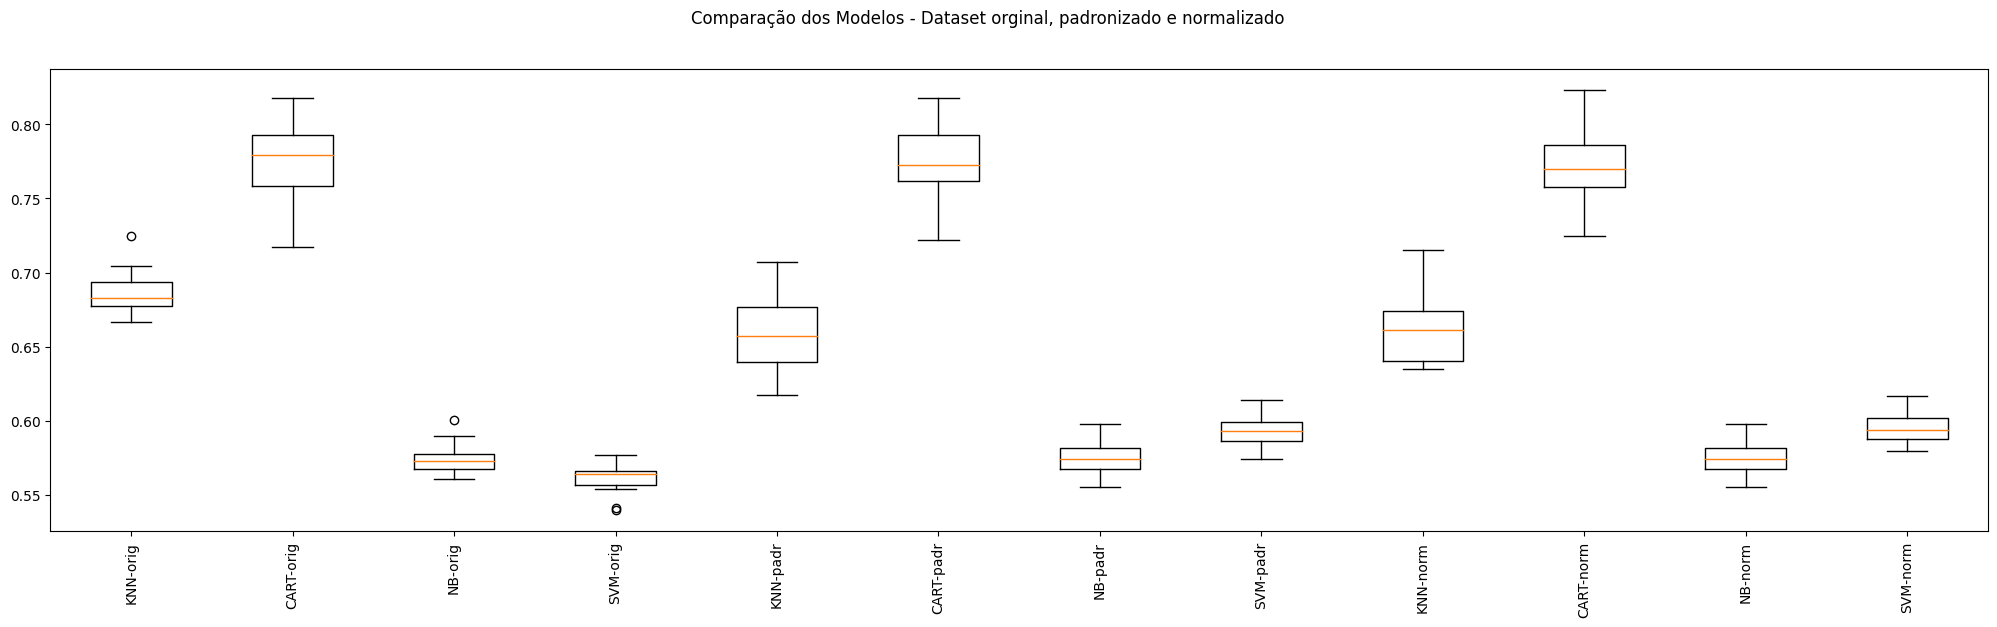

In [32]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [33]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.694502 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-padr - Melhor: 0.707715 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.708506 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


## Finalização do Modelo

In [34]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=7)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.6976744186046512


In [35]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

## Simulando a aplicação do modelo em dados não vistos

In [36]:
# Novos dados - não sabemos a classe!
data = {'RESG_DIA':  [22564.0, 0.0, 0.0],
        'CAPTC_DIA': [211524.8, 543051.92, 300.28],
        'NR_COTST': [3835, 13956, 3317],
        'VL_PATRIM_LIQ': [80334691.1, 751324937.95, 1080548.72],
        }

atributos = ['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.55052848  1.47180438  0.04817347 -0.54950203]
 [-0.62578151  4.60405781  3.1345937   2.40413619]
 [-0.62578151 -0.52383546 -0.10979172 -0.89837158]]


In [37]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 1.]


## Salvando Modelo

In [55]:
# Salvando o modelo
drive.mount('/content/gdrive')

path = "/content/gdrive/My Drive/"
pickle_out = open(path + 'FI_Multi.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

print(os.path.join(path, 'FI_Multi.pkl'))
print(os.getcwd())

Mounted at /content/gdrive
/content/gdrive/My Drive/FI_Multi.pkl
/content
